In [1]:
from jaxdf.geometry import Domain
domain = Domain((16,),(2/16.,))

# Discretization API

`jaxdf` revolves around the concept of discretization.

We will call **discretization family** the mapping $\mathcal{D}$ that associates a function $f$ to a set of discrete parameters $\theta$

$$
\theta \xrightarrow{\mathcal{D}}f
$$

with $f \in \text{Range}(\mathcal{D})$ or, in other words, $f_\theta(x) = \mathcal{D}(\theta, x)$ is a function parametrized by $\theta$.

$\theta$ is the **discrete representation** of $f$ over $\mathcal{D}$. The latter is analogous to the interpolation function defined in other libraries (See for example the [Operator Discretization Library](https://odl.readthedocs.io))

### Example

A simple example of discretization family is the set of $N$-th order polynomials on the interval $[0,1)$: 

$$
\mathcal{P}_N(\theta,x) = \sum_{i=0}^N \theta_i x^i, \qquad \theta \in \mathbb{R}^{N+1}
$$

In `jaxdf`, we construct such a discretization using the `Arbitrary` discretization. To do so, we have to provide the function $\mathcal{P}_N$ and an initialization function for the parameters

In [2]:
from jaxdf.discretization import Arbitrary
from jax.random import normal, PRNGKey

N = 10

def p_n(theta, x):
    i = jnp.arange(N)
    powers = x**i
    return jnp.sum(theta*(x**i))

def init_params(seed, domain):
    return normal(seed, (N,))

polynomial_discretization = Arbitrary(domain, p_n, init_params)
y_params, y = polynomial_discretization.random_field(seed=PRNGKey(0), name='y')

In [3]:
y_params

DeviceArray([-0.372111  ,  0.26423106, -0.18252774, -0.7368198 ,
             -0.44030386, -0.15214427, -0.6713536 , -0.5908642 ,
              0.73168874,  0.5673025 ], dtype=float32)

<StemContainer object of 3 artists>

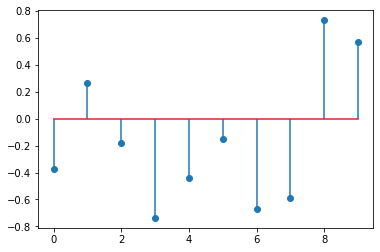

In [4]:
from matplotlib import pyplot as plt

plt.stem(y_params)

In [5]:
from jax import numpy as jnp

y_sampled = polynomial_discretization.get_field_on_grid()(y_params)
x_coord = domain.spatial_axis[0]

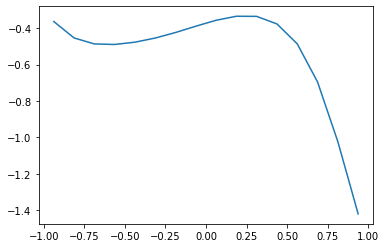

In [6]:
plt.plot(x_coord, y_sampled)

In [9]:
y_sample = polynomial_discretization.get_field()(y_params, 0.75)
print(y_sample)

-0.84538496
